# Shifted Schwefel, dimension=50
**Using Pygmo PSO_GEN (Particle Swarm Optimisation GENerational)**

In [1]:
import sys
sys.path.append("../")

In [2]:
import pygmo as pg
from functions_class import Shifted_schwefel
from helpers import pso_gen
from helpers import get_stats, plot_f_minus_fstar_10

In [3]:
dimension = 50

In [4]:
params = {
    "nb_generation": 4000,
    "omega": 0.72,
    "eta1": 2.05,
    "eta2": 2.05,
    "max_vel": 0.03,
    "variant": 2,
    "neighb_type": 1,
    "neighb_param": 1
         }

In [5]:
population_size = 50

In [6]:
verbose=False
runs = []
for i in range(10):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    schwefel_pb = pg.problem(Shifted_schwefel(dimension))
    logs, duration, champion_f, champion_x = pso_gen(schwefel_pb, population_size, params)
    fevals = [log[1] for log in logs]
    fitness_best = [log[2] for log in logs]
    runs.append([fevals, fitness_best, duration, champion_f[0], champion_x])
    if verbose:
        print("run {0:2} -> duration: {1}mn:{2}s, champion_f: {3:.4f}".
              format(i, duration.seconds//60, duration.seconds%60, champion_f[0]))

In [7]:
stats = get_stats(runs, Shifted_schwefel.BIAS,
                  Shifted_schwefel.OPTIMUM, population_size)

duration = stats["duration"]

if duration.seconds == 0:
    duration = "{0}ms".format(duration.microseconds//1000)
else:
    duration = "{0}mn:{1}s".format(duration.seconds//60,
                                   duration.seconds%60)
print("--- Statistics ---")
print("Population size of {0} and {1} generations".
      format(population_size, params["nb_generation"]))
print("-> Best run duration:                        | {0}".format(duration))
print("-> Best f value:                             | {0:12.7f}".format(stats["best_champion_f"]))
print("-> Difference with function's optimum value: | {0:13.7f}".format(stats["diff_optimum"]))
print("-> L2 norm to optimum solution:              | {0:13.7f}".format(stats["norm2_to_optimum"]))
print("-> Number of function evaluations            | {0:,}".format(stats["nb_fevals"]))

--- Statistics ---
Population size of 50 and 4000 generations
-> Best run duration:                        | 0mn:5s
-> Best f value:                             | -447.0083807
-> Difference with function's optimum value: |     2.9916193
-> L2 norm to optimum solution:              |    10.9196091
-> Number of function evaluations            | 200,000


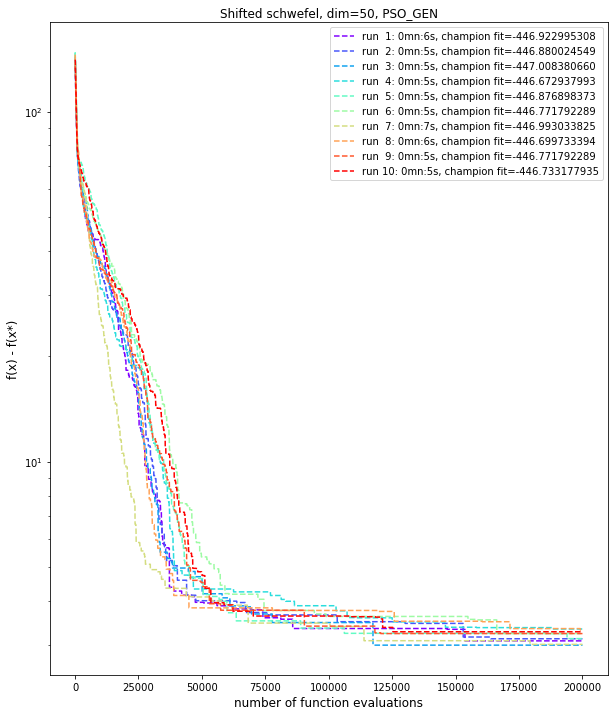

In [8]:
plot_f_minus_fstar_10(runs, Shifted_schwefel.BIAS, title="Shifted schwefel, dim=50, PSO_GEN")